# Lab 6: Convolutional Neural Network (CNN)

# Name: Moses Mbabaali
# Matricola: 4846019

<img src="https://drive.google.com/uc?id=1jUGAOq9z6rLNTq8Y1zHxFF76h5lplwRO" width="600px" align="right"><br>
In this laboratory we continue to work with Keras. We will focus on Convolutional Neural Network
we are going to work with a dataset made by approximately five thousand images of different sizes showing plastic shapes -one shape per picture- coming from 10 different classes. <br>
<br>
The data have been acquired in the development of a lab activity presented at Festival della Scienza 2019 <br>
During this laboratory we are going to focus over the shape recognition module by trying to classify single shapes inside the pictures<br>
<br>
Therefore the main goal of this laboratory is to solve a multiclass classification problem with 10 different classes

In [1]:
# Download the dataset in Google Drive
!wget https://www.dropbox.com/s/yt4qfxcc5yp3qmw/dataset.zip?dl=0
# Unzip the dataset
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/House/House_Green_Vertical_Morning_0_frame56.jpg  
  inflating: __MACOSX/dataset/train/House/._House_Green_Vertical_Morning_0_frame56.jpg  
  inflating: dataset/train/House/House_Green_Vertical_Morning_0_frame1321.jpg  
  inflating: __MACOSX/dataset/train/House/._House_Green_Vertical_Morning_0_frame1321.jpg  
  inflating: dataset/train/House/House_Red_Morning_0_frame1370.jpg  
  inflating: __MACOSX/dataset/train/House/._House_Red_Morning_0_frame1370.jpg  
  inflating: dataset/train/House/House_Red_Morning_0_frame1364.jpg  
  inflating: __MACOSX/dataset/train/House/._House_Red_Morning_0_frame1364.jpg  
  inflating: dataset/train/House/House_Green_Vertical_Morning_0_frame1335.jpg  
  inflating: __MACOSX/dataset/train/House/._House_Green_Vertical_Morning_0_frame1335.jpg  
  inflating: dataset/train/House/House_Green_Vertical_Morning_0_frame81.jpg  
  inflating: __MACOSX/dataset/train/House/._House_Green_Vertical

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
categories = ["Bat", "Boy", "Car", "Crocodile", "Girl", "House", "If", "Lion", "Monkey", "Tree"]
new_im_size = 128
channels = 3

train_data_dir = "dataset/train"
test_data_dir = "dataset/test"

# 6.1 Dataset pre-processing
The first thing that we need to do when we are dealing with a new dataset is to operate some pre-processing operations. Data preprocessing usually refers to the steps applied to make data more suitable for learning. 
In this section we are going to deal with:
* 6.1.1 Dataset loading
* 6.1.2 Normalization
* 6.1.3 Standardization
* 6.1.4 Splitting and label preprocessing


## 6.1.1 Dataset loading
In this section we load the dataset generated in the previous section

In [3]:
# Dataset loading
def load_dataset(data_dir_path):
	X = []
	Y = []
	for i in range(len(categories)):
		category = categories[i]
		print("Loading " + category + "..")

		import glob
		only_jpg = glob.glob(data_dir_path + "/" + category + "/*.jpg")				# Getting all the .jpg images
		only_png = glob.glob(data_dir_path + "/" + category + "/*.png")				# Getting all the .png images
		only_images = only_jpg + only_png											# Merging all the images

		for file_name in only_images:												# For every image in the dataset
			image = Image.open(file_name).convert('RGB')
			image = image.resize((new_im_size, new_im_size))						# Resize the image
			X.append(np.array(image, dtype=np.float32))
			Y.append(i)
	return X, Y

In [4]:
print("Loading training set..")
train_X, train_Y = load_dataset(train_data_dir)											# Loading the training set

# Creating the test set
from sklearn.model_selection import train_test_split
print("Splitting training set to create test set..")
train_X, test_X, train_Y, test_Y = train_test_split(train_X, train_Y, test_size=0.1, random_state=13)

Loading training set..
Loading Bat..
Loading Boy..
Loading Car..
Loading Crocodile..
Loading Girl..
Loading House..
Loading If..
Loading Lion..
Loading Monkey..
Loading Tree..
Splitting training set to create test set..


## 6.1.2 Standardization
A common practice in data pre-processing is standardization.<br>
The idea about standardization is to compute your dataset mean and standard deviation in order to subtract from every data point $x$ the dataset mean $\mu$ and then divide by the standard deviation $\sigma$.<br>
That is to apply the following operation:<br>
<img src="https://drive.google.com/uc?id=1rpuybw_fmI8XK38JQhWWxX2TOExBAV2V" width="150px"><br>
The outcome of this operation is to obtain a distribution with mean equal to 0 and a standard deviation equal to 1.<br>
By applying normalization to our data we are making the features more similar to each other and this usually makes the learning process easier.<br>
To better understand that we can show an example of what happens after a standardization process is applied to a dataset:
<img src="https://drive.google.com/uc?id=1wtqTW4hz8n8k7b7q0mUSzCc9X0npNUY2" width="500px" align="left"><br>

In [5]:
# Standardizing the data
def standardize_dataset(X):
	image_means = []
	image_stds = []

	for image in X:
		image_means.append(np.mean(image))											# Computing the image mean
		image_stds.append(np.std(image))											# Computing the image standard deviation

	dataset_mean = np.mean(image_means)												# Computing the dataset mean
	dataset_std = np.mean(image_stds)												# Computing the dataset standard deviation
	return dataset_mean, dataset_std					

In [6]:
dataset_mean, dataset_std = standardize_dataset(train_X)
print("Standardizing training set..")
train_X = (train_X-dataset_mean)/dataset_std												# Standardizing the training set
print("Standardizing test set..")
test_X = (test_X-dataset_mean)/dataset_std												# Standardizing the test set

Standardizing training set..
Standardizing test set..


## 6.1.3 Normalization
Another common practice in training a Neural Network is to normalize the images by dividing each pixel value by the maximum value that we can have, i.e. 255.<br>
The purpose of this is to obtain a mean close to 0.<br>
Normalizing the data generally speeds up learning and leads to faster convergence

In [7]:
# Normalizing the data
print("Normalizing training set..")
train_X = np.asarray(train_X, dtype=np.float32) / 255										# Normalizing training set
print("Normalizing test set..")
test_X = np.asarray(test_X, dtype=np.float32) / 255											# Normalizing test set

Normalizing training set..
Normalizing test set..


## 6.1.4 Splitting and label preprocessing
Now we just need to split our training set in orer to get the validation set and convert our labels to one-hot representation

In [8]:
# Creating the validation set
from sklearn.model_selection import train_test_split
print("Splitting training set to create validation set..")
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)

# Converting labels to one-hot representation
from keras.utils.np_utils import to_categorical
train_Y_one_hot = to_categorical(train_Y)						# Converting training labels to one-hot representation
valid_Y_one_hot = to_categorical(valid_Y)						# Converting validation labels to one-hot representation
test_Y_one_hot = to_categorical(test_Y)							# Converting test labels to one-hot representation

Splitting training set to create validation set..


# 6.2 Training a model from scratch
Now that we have properly pre-processed our data, we are going to create a convolutional model in Keras. 
Usually a convolutional model is made by two subsequent part:
* A convolutional part
* A fully connected

We can show an example of the general structure in the next picture:
<img src="https://drive.google.com/uc?id=1duP8u9bs6ELNu4degUuYP4-YS1mBYn2O" width="600px"><br>

Usually the convolutional part is made by some layers composed by
* convolutional layer: performs a spatial convolution over images
* pooling layer: used to reduce the output spatial dimension from $n$ to 1 by averaging the $n$ different value or considering the maximum between them 
* dropout layer: applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.

The convolutional part produces its output and the fully connected part ties together the received information in order to solve the classification problem

In [9]:
# Creating the model from scratch
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import accuracy_score

# Network parameters
batch_size = 16													# Setting the batch size
epochs = 10														# Setting the number of epochs
num_classes = len(categories)									# Getting the amount of classes

scratch_model = Sequential()	

# Build here your keras model.
# Try to use one or more convolutional layer, joint with pooling layer and dropout layer
# Try to use one or more convolutional layer, joint with pooling layer and dropout layer
scratch_model.add(Conv2D(128, input_shape=(128, 128, 3),kernel_size=(3, 3), padding='same', activation='relu'))
scratch_model.add(MaxPooling2D(pool_size=(2, 2)))
scratch_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
scratch_model.add(MaxPooling2D(pool_size=(2, 2)))
scratch_model.add(Flatten())
scratch_model.add(Dense(256, activation='relu' ))
scratch_model.add(Dropout(0.25))
scratch_model.add(Dense(num_classes, activation='softmax'))



# Compile the model with the Adam optimizer
scratch_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the model through the summary function
scratch_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               8388864   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [10]:
# Let's train the model!
scratch_model_history = scratch_model.fit(train_X, train_Y_one_hot, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(valid_X, valid_Y_one_hot))

Epoch 1/10
319/319 [==============================] - 9s 21ms/step - loss: 1.0587 - accuracy: 0.6363 - val_loss: 0.1633 - val_accuracy: 0.9475
Epoch 2/10
319/319 [==============================] - 6s 19ms/step - loss: 0.0775 - accuracy: 0.9798 - val_loss: 0.0493 - val_accuracy: 0.9820
Epoch 3/10
319/319 [==============================] - 6s 19ms/step - loss: 0.0398 - accuracy: 0.9884 - val_loss: 0.0307 - val_accuracy: 0.9898
Epoch 4/10
319/319 [==============================] - 6s 19ms/step - loss: 0.0209 - accuracy: 0.9923 - val_loss: 0.0078 - val_accuracy: 0.9984
Epoch 5/10
319/319 [==============================] - 6s 19ms/step - loss: 0.0047 - accuracy: 0.9978 - val_loss: 0.0100 - val_accuracy: 0.9977
Epoch 6/10
319/319 [==============================] - 6s 19ms/step - loss: 0.0055 - accuracy: 0.9977 - val_loss: 0.0061 - val_accuracy: 0.9977
Epoch 7/10
319/319 [==============================] - 6s 19ms/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.0092 - val_accuracy: 0.9984

In [11]:
# Getting the results
scratch_model_train_acc = scratch_model_history.history['accuracy']
scratch_model_valid_acc = scratch_model_history.history['val_accuracy']
scratch_model_train_loss = scratch_model_history.history['loss']
scratch_model_valid_loss = scratch_model_history.history['val_loss']

print("Test accuracy: ", accuracy_score(np.argmax(scratch_model.predict(test_X), axis=-1), test_Y))			# Testing the model

Test accuracy:  0.9943582510578279


In [12]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

#plot_history(scratch_model_history)

In [13]:
print(train_X.shape)

(5104, 128, 128, 3)


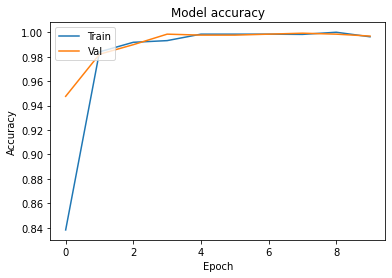

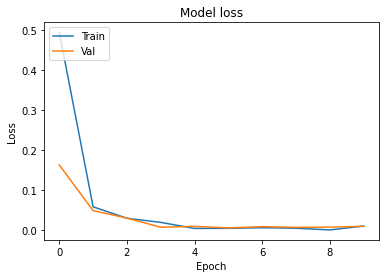

In [14]:
plot_history(scratch_model_history)

**Is the obtained value coherent with what you expected?**<br> Yes it the same as what i had expected though the extension of (128, 128, 3) in this case represents the image size and the the rgb color. 

**What are the differences when using a different batch size? Why?**<br> Having the different batch size will affect the training time. If the batch size is big then the training time will be much more compared to if the batch size is smaller. For example a 1000 batch size will take longer to train a model than a 16 batch size. 

# 6.3 Data Augmentation
Before even starting to load the dataset we should ask ourself whether the available amount of data is sufficient to our purposes.<br>
When the answer is negative we could need to do "data augmentation".<br>
Doing data augmentation means to increase the number of available data points. In terms of images, it may mean that increasing the number of images in the dataset. A common way to do this is to generate new images by applying a linear transformation to the original images in the dataset.<br>
The most common linear transformations are the following:<br>
* Rotation
* Shifting
* Blurring
* Change lighting conditions

In the picture below we show an example of augmentation:<br>
<img src="https://drive.google.com/uc?id=1B74snda_oJKkhVzxch9Ov8Y1XL63U3w5" width="600px" align="left"><br>

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=5,
  width_shift_range=0.1,
  height_shift_range=0.1,
  fill_mode="nearest",
)

flow = datagen.flow(train_X, train_Y_one_hot)

Now try to build a new model dealing with the augmented dataset.

In [16]:
# Build here your keras model dealing with the augmented dataset

scratch_model_history2 = scratch_model.fit(flow, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(valid_X, valid_Y_one_hot))


Epoch 1/10
160/160 [==============================] - 20s 124ms/step - loss: 0.6508 - accuracy: 0.8011 - val_loss: 0.0248 - val_accuracy: 0.9969
Epoch 2/10
160/160 [==============================] - 20s 125ms/step - loss: 0.2596 - accuracy: 0.9228 - val_loss: 0.0129 - val_accuracy: 0.9992
Epoch 3/10
160/160 [==============================] - 20s 124ms/step - loss: 0.1684 - accuracy: 0.9489 - val_loss: 0.0161 - val_accuracy: 0.9984
Epoch 4/10
160/160 [==============================] - 20s 125ms/step - loss: 0.1209 - accuracy: 0.9612 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 5/10
160/160 [==============================] - 20s 124ms/step - loss: 0.0973 - accuracy: 0.9698 - val_loss: 0.0063 - val_accuracy: 0.9977
Epoch 6/10
160/160 [==============================] - 20s 125ms/step - loss: 0.0860 - accuracy: 0.9730 - val_loss: 0.0122 - val_accuracy: 0.9984
Epoch 7/10
160/160 [==============================] - 20s 124ms/step - loss: 0.0829 - accuracy: 0.9710 - val_loss: 0.0041 - val_ac

In [17]:
# Getting the results
scratch_model_train_acc = scratch_model_history2.history['accuracy']
scratch_model_valid_acc = scratch_model_history2.history['val_accuracy']
scratch_model_train_loss = scratch_model_history2.history['loss']
scratch_model_valid_loss = scratch_model_history2.history['val_loss']

print("Test accuracy: ", accuracy_score(np.argmax(scratch_model.predict(test_X), axis=-1), test_Y))	

Test accuracy:  0.995768688293371


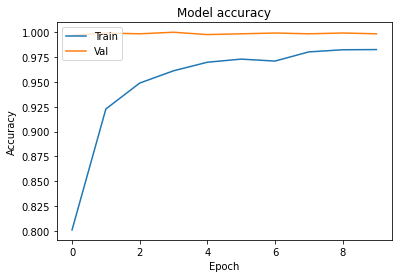

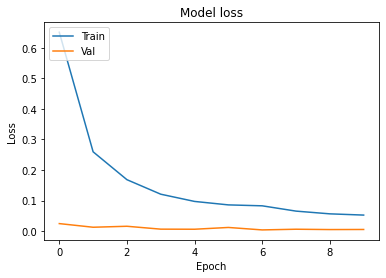

In [18]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

plot_history(scratch_model_history2)
#scratch_model_history    

**What is the performance obtained on this new augmented dataset?**<br> The performance is slightly better than the one where the data was not augumented by a thread. Maybe by .001

**How can you explain the obtained result?**
**<br> With neural networks the more data a network has better because it has lots of examples to learn from. 


# 6.4 Using a pre-trained model
A common alternative to train a model from scratch consists in using a pre-trained model.<br>
The idea is to replace the convolutional part with a highly optimized convolutional part engineered and trained previously by someone else.<br>
Usually the models that we can use through keras.applications have been trained over the image net dataset. <br>
Today we are going to use the Xception Net model. Its architecture it is shown below:
<img src="https://drive.google.com/uc?id=1eKivBCSKnWKyBxmGe5s64oOyhzhuCaqU" width="600px"><br>
After the convolutional part replacement we still need to set up a fully connected part.<br>
**Why in this lab we cannot use the fully connected part of Xception Net?<br>** - First its computationally intensive therefore it needs lots of resources.
- Second it takes lots data. 
- Third it takes lots time to train, the original Xception models took around 3 days to 3 months to train. 

**What should we do to use it?<br>**
- Increase the available resources. Several GPUs. 
- Increase the amount of data to train on in terms of classes. Say over 5000 classes.

**And more in general in which situations we can do that?**
- When there are lots of classes to classify. 
- When the dataset is quite big.
- When we have enough resources for such a job. 

Moreover, using a pre-trained network is not always the best choice<br>
**Can you guess in which situations could be useful to use a pre-trained model?**
- When all the above are true. 
- When we have enough time for the experiment. 


In [19]:
# Creating the model based over the pretrained Xception network
from tensorflow.keras import applications
Xception_model = applications.Xception(weights = "imagenet", include_top=False, input_shape = (new_im_size, new_im_size, channels))

# Producing the feature
train_X_feature = Xception_model.predict(train_X)					# Producing the train feature
valid_X_feature = Xception_model.predict(valid_X)					# Producing the test feature


from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Creating a simple model that will classify the extracted features from the Xception network
pretrained_model = models.Sequential()
pretrained_model.add(layers.Flatten())
pretrained_model.add(layers.Dense(64, activation='relu'))
pretrained_model.add(layers.Dropout(0.3))
pretrained_model.add(layers.Dense(num_classes, activation='softmax'))
pretrained_model.compile(optimizer=optimizers.RMSprop(lr=2e-4),loss='categorical_crossentropy',metrics=['acc'])

In [20]:
# Visualize the model through the summary function
scratch_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               8388864   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [21]:
# Let's train the model!
pretrained_model_history = pretrained_model.fit(train_X_feature, train_Y_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(valid_X_feature, valid_Y_one_hot))

Epoch 1/10
319/319 [==============================] - 2s 5ms/step - loss: 1.7716 - acc: 0.4327 - val_loss: 1.0516 - val_acc: 0.8340
Epoch 2/10
319/319 [==============================] - 1s 4ms/step - loss: 1.0292 - acc: 0.7658 - val_loss: 0.6884 - val_acc: 0.9092
Epoch 3/10
319/319 [==============================] - 1s 4ms/step - loss: 0.7268 - acc: 0.8360 - val_loss: 0.4993 - val_acc: 0.9240
Epoch 4/10
319/319 [==============================] - 1s 4ms/step - loss: 0.5430 - acc: 0.8823 - val_loss: 0.3771 - val_acc: 0.9475
Epoch 5/10
319/319 [==============================] - 1s 4ms/step - loss: 0.4345 - acc: 0.9029 - val_loss: 0.3002 - val_acc: 0.9499
Epoch 6/10
319/319 [==============================] - 1s 4ms/step - loss: 0.3504 - acc: 0.9186 - val_loss: 0.2403 - val_acc: 0.9632
Epoch 7/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2979 - acc: 0.9319 - val_loss: 0.1981 - val_acc: 0.9624
Epoch 8/10
319/319 [==============================] - 1s 4ms/step - loss: 0.

In [22]:
# Getting the results
pretrained_model_train_acc = pretrained_model_history.history['acc']
pretrained_model_valid_acc = pretrained_model_history.history['val_acc']
pretrained_model_train_loss = pretrained_model_history.history['loss']
pretrained_model_valid_loss = pretrained_model_history.history['val_loss']

test_X_feature = Xception_model.predict(test_X)						# Producing the test feature
print("Test accuracy: ", accuracy_score(np.argmax(scratch_model.predict(test_X), axis=-1), test_Y))			# Testing the model

Test accuracy:  0.995768688293371


# 6.5 Comparing the models
Now that we trained both the "from scratch" and the "pre-trained" models, we are going to compare the obtained results obtained during the training. We are going to consider accuracy and loss.<br>
**What can you expect from these plots?**

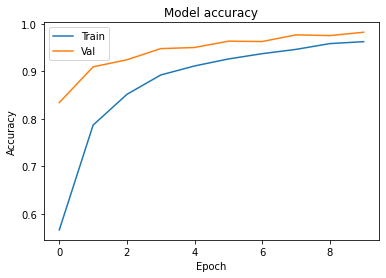

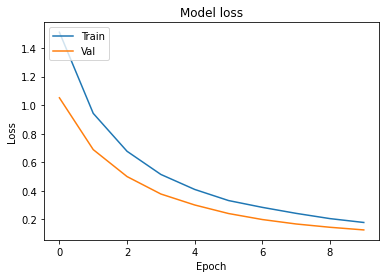

In [23]:
# Create here the plots to compare the "from scratch" model and the "pretrained" model
# Try to produce a comparison plot about the accuracies (train and validation) and another plot for the losses
def plot_history2(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
plot_history2(pretrained_model_history)

**What information can you get from these plots?**<br>
- The plot below is for the Xception above i do have the one for the scratch_model, so comparing both plots it appears that as the training accuracy improves the training loss decreases. The same is true for the validation. 

**Are they showing what you expected?**
- Yes, pretty much the trend has been the same. 